# Functions For The Mandelbrot And Julia Set

## The Mandelbrot Set
The Mandelbrot set is the set of all complex numbers $c$ such that the fixed-point iteration
$$ z_{i+1} = z_i^2 + c, \quad z_0 = 0$$
stays finite and does not diverge to infinity.

Since you cannot have a loop go to infinity, you define infinity to be ```50``` for instance which is totally reasonable... and an iteration limit of ```200``` in this case. If after ```200``` iterations $|z_{200}|$ is smaller than ```50```, $c$ is in the Mandelbrot set but if $|z_i|$ is greater than ```50``` before completing ```200``` iterations, $c$ therfore is not in the Mandelbrot set and the number of iterations is saved in a matrix. This matrix is later plotted and will result in the image most people know as the Mandelbrot set.

In [45]:
function mandelbrot(re_min, re_max, im_min, im_max, re_resolution, im_resolution=nothing)
    inf = 50
    max_iterations = 200
    
    im_resolution = im_resolution == nothing ? re_resolution : im_resolution

    re_range = range(re_min, re_max, length=re_resolution)
    im_range = range(im_min, im_max, length=im_resolution)
    
    M = complex.(re_range', im_range)
    
    f(z,c) = z^2 + c # Function for the mandelbrot set
    
    function iteration(c)
        z0 = 0
        for k = 1:max_iterations
            z1 = f(z0, c)
            if abs(z1) >= inf
                return k
                break
            end
            z0 = z1    
        end
        return max_iterations
    end

    iterations = map(iteration, M)
    
    return re_range, im_range, iterations
end;

## The Julia Set
Let the complex-valued function $f$ be a nonconstant holomorphic function which means $f$ is complex-differentiable in a neighborhood of each point in the domain of $f$. The Julia set is all the complex numbers $z_0$ for which
$$z_{i+1} = f(z_i)$$
stays finite as $i=0,1,2,...$ approaches infinity.

Here depending on the function $f$, the value $|z_i|$ could converge to a point that is larger than ```50``` or ```100``` so you may need to change the definition of infinity. It sounds so bizarre to define infinity to be a number... but hey, thats how this works. Also increasing the iteration limit may be necessary.

In [47]:
function julia(f, re_min, re_max, im_min, im_max, re_resolution, im_resolution=nothing)
    inf = 100
    max_iterations = 100

    im_resolution = im_resolution == nothing ? re_resolution : im_resolution

    re_range = range(re_min, re_max, length=re_resolution)
    im_range = range(im_min, im_max, length=im_resolution)
    
    M = complex.(re_range',im_range)
    
    function iteration(z)
        z0 = z
        for k = 1:max_iterations
            z1 = f(z0)
            if abs(z1) >= inf
                return k
                break
            end
            z0 = z1    
        end
        return max_iterations
    end

    iterations = map(iteration,M)
    return re_range, im_range, iterations
end;

# Mandelbrot Set Plot

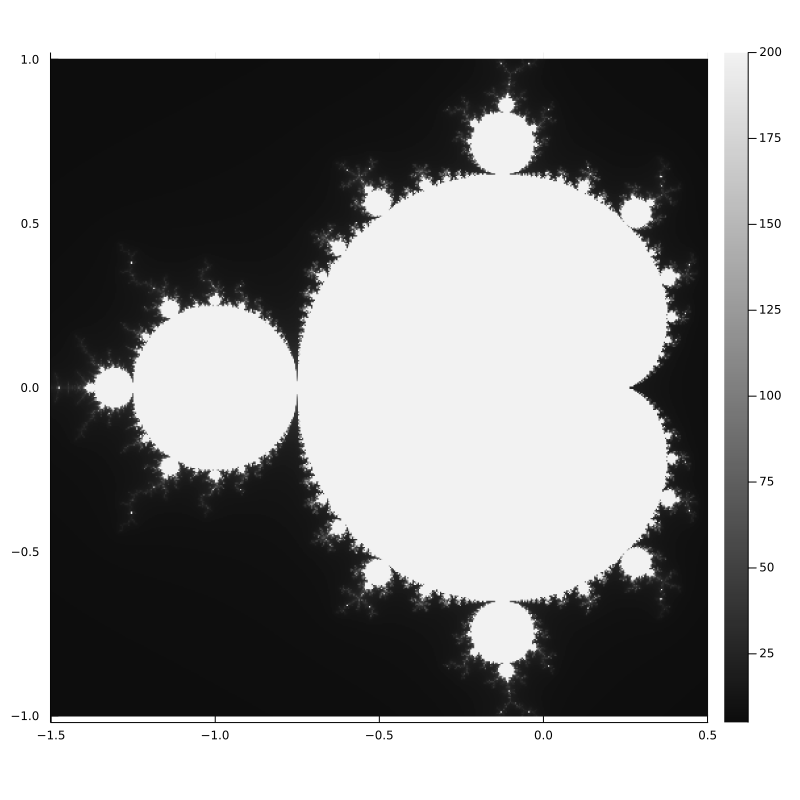

In [63]:
using Plots

re_min = -1.5
re_max = 0.5
im_min = -1
im_max = 1
re_resolution = 500
im_resolution = 500

re_range, im_range, iterations = mandelbrot(re_min, re_max,im_min, im_max, re_resolution, im_resolution)

heatmap(re_range, im_range, iterations, color=:grays, aspect_ratio=1)

# Julia Set Plot

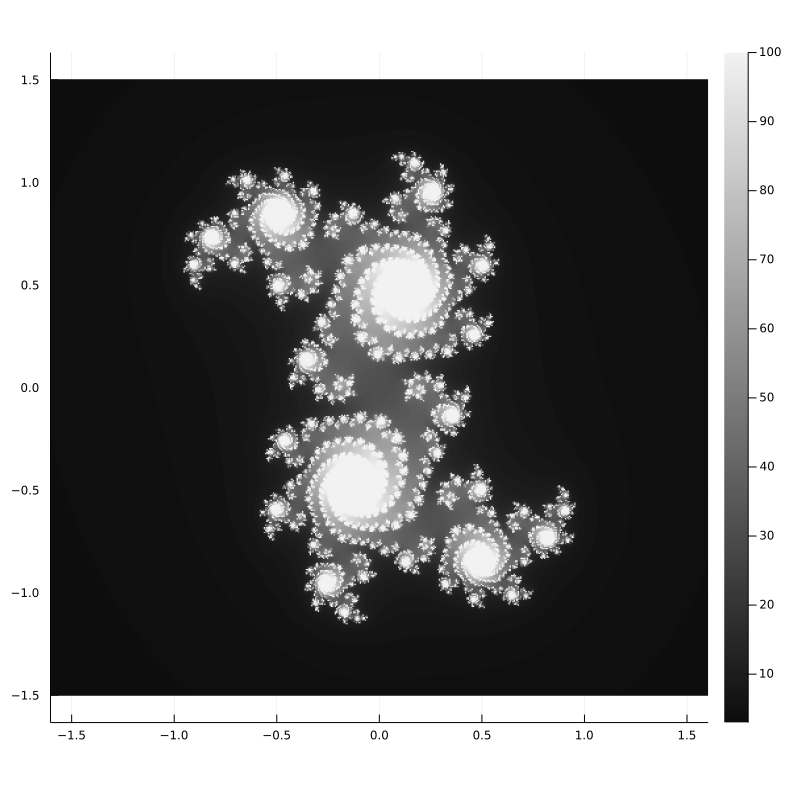

In [64]:
using Plots

re_min = -1.6
re_max = 1.6
im_min = -1.5
im_max = 1.5
re_resolution = 500
im_resolution = 500

f(z) = z^2 + complex(0.355,0.355) # Spirals

#f(z) = z^2 - 0.6 + 0.6im # Snowflakes

#f(z) = (exp(z))/2 # Flower Pattern or something along the lines


re_range, im_range, iterations = julia(f, re_min, re_max,im_min, im_max,re_resolution, im_resolution)

heatmap(re_range, im_range, iterations, color=:grays, aspect_ratio=1)